In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd

In [2]:
points_fn = '../data/glofasv4_discharge_locations.gpkg'
nsr_fn = '../data/glofas4_nsr_1979_2025.nc'
hoa_fn = '../data/glofas4_hoa_1979_2025.nc'

In [3]:
nsr_bounds = [-5.0, 45.5, 15.5, 63.5,]
hoa_bounds = [7.0, -20.5, 60.5, 31.5,]

In [4]:
points_gdf = gpd.read_file(points_fn)
points_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
479,GOBI DESERT,2,5612,953,7.298325e+10,POINT (100.57500 42.37500)
480,TIBETAN PLATEAU,2,5382,1169,4.499326e+10,POINT (89.07500 31.57500)
481,TIBETAN PLATEAU,2,5383,1168,4.351758e+10,POINT (89.12500 31.62500)
482,TIBETAN PLATEAU,2,5383,1167,4.349128e+10,POINT (89.12500 31.67500)


In [5]:
nsr_ds = xr.open_dataset(nsr_fn)
nsr_ds

<xarray.Dataset>
Dimensions:     (time: 16833, latitude: 410, longitude: 360)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 15.47 15.42 15.37 ... -4.875 -4.925 -4.975
  * longitude   (longitude) float64 45.52 45.57 45.62 ... 63.37 63.42 63.47
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-15T14:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
# Filter by bounds
minx, miny, maxx, maxy = nsr_bounds
points_nsr_gdf = points_gdf.cx[minx:maxx, miny:maxy]

In [13]:
points_nsr_gdf

,name,endo,x,y,upstream_area,geometry
204,RHINE,0,3683,764,1.965476e+11,POINT (4.12500 51.82500)
205,RHINE,0,3684,765,1.964710e+11,POINT (4.17500 51.77500)
206,RHINE,0,3685,765,1.964326e+11,POINT (4.22500 51.77500)
207,RHINE,0,3686,766,1.962216e+11,POINT (4.27500 51.72500)
208,GUDENA,0,3886,722,1.316110e+11,POINT (14.27500 53.92500)
209,GUDENA,0,3886,723,1.315928e+11,POINT (14.27500 53.87500)
210,GUDENA,0,3887,724,1.314830e+11,POINT (14.32500 53.82500)
211,GUDENA,0,3878,724,5.846508e+09,POINT (13.87500 53.82500)
220,ANGERMAN,0,3837,647,5.119166e+10,POINT (11.82500 57.67500)
221,ANGERMAN,0,3838,647,5.115845e+10,POINT (11.87500 57.67500)


In [9]:
nsr_ds.dis24

<xarray.DataArray 'dis24' (time: 16833, latitude: 410, longitude: 360)>
[2484550800 values with dtype=float32]
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] 1 days
    surface     float64 0.0
  * latitude    (latitude) float64 15.47 15.42 15.37 ... -4.875 -4.925 -4.975
  * longitude   (longitude) float64 45.52 45.57 45.62 ... 63.37 63.42 63.47
    valid_time  (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2025-02-01
Attributes:
    GRIB_paramId:                             240024
    GRIB_dataType:                            sfo
    GRIB_numberOfPoints:                      147600
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  410
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           dis24
    GRIB_gridDefinitionDescription:           Latitude/longitude
    GRIB_iDirectionIncrementInDegrees:        0.05
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.05
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   15.475
    GRIB_latitudeOfLastGridPointInDegrees:    -4.975
    GRIB_longitudeOfFirstGridPointInDegrees:  45.525
    GRIB_longitudeOfLastGridPointInDegrees:   63.475
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean discharge in the last 24 h...
    GRIB_shortName:                           dis24
    GRIB_units:                               m**3 s**-1
    long_name:                                Mean discharge in the last 24 h...
    units:                                    m**3 s**-1
    standard_name:                            unknown

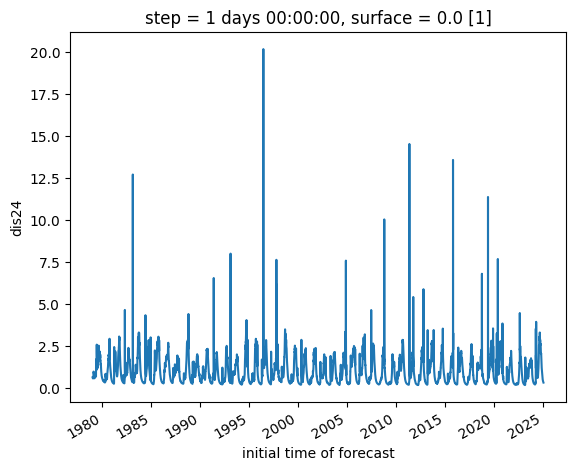

In [12]:
nsr_ds.dis24.mean(dim = ['latitude', 'longitude']).plot()

Thus, there is some discharge data available

Is the bounding box properly set?

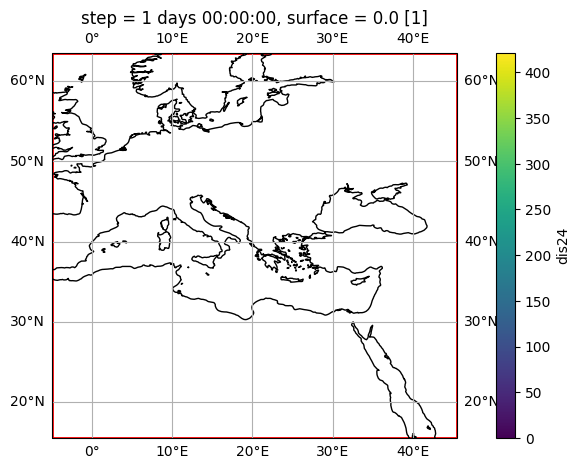

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(nsr_bounds, crs=ccrs.PlateCarree())

# Plot the data
nsr_ds.dis24.mean(dim = 'time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add a bounding box
bbox = nsr_bounds
ax.add_patch(plt.Rectangle((bbox[0], bbox[2]), bbox[1]-bbox[0], bbox[3]-bbox[2], fill=False, color='red', linewidth=2, transform=ccrs.PlateCarree()))

plt.show()



Bounding box appears to make sense, however, where is the plot?

In [19]:
print(nsr_ds.dis24)


<xarray.DataArray 'dis24' (time: 16833, latitude: 410, longitude: 360)>
array([[[3.734375, 0.      , ...,      nan,      nan],
        [0.      , 0.      , ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[3.6875  , 0.      , ...,      nan,      nan],
        [0.      , 0.      , ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[0.      , 0.      , ...,      nan,      nan],
        [0.      , 0.      , ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.      , 0.      , ...,      nan,      nan],
        [0.      , 0.      , ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...

In [21]:
print(nsr_ds.dis24.dims)


('time', 'latitude', 'longitude')


In [22]:
mean_dis24 = nsr_ds.dis24.mean(dim='time')
print(mean_dis24)


<xarray.DataArray 'dis24' (latitude: 410, longitude: 360)>
array([[5.4479065e+00, 1.1287353e-03, 4.5948621e-02, ...,           nan,
                  nan,           nan],
       [3.8739011e-02, 4.2229641e-02, 4.4699214e-02, ...,           nan,
                  nan,           nan],
       [2.3670024e-03, 1.2067071e-03, 2.9573606e-02, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
    step       timedelta64[ns] 1 days
    surface    float64 0.0
  * latitude   (latitude) float64 15.47 15.42 15.37 ... -4.875 -4.925 -4.975
  * longitude  (longitude) float64 45.52 45.57 45.62 45.67 ... 63.37 63.42 63.47


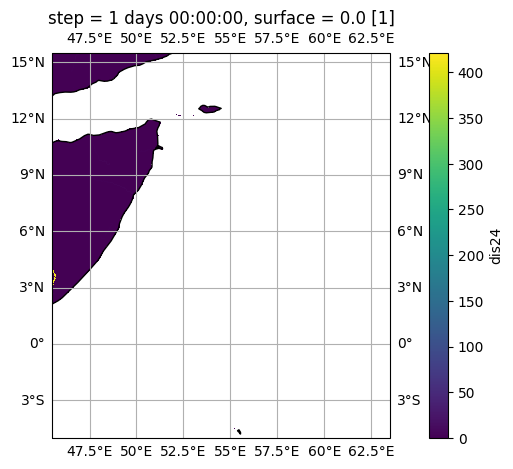

In [23]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
mean_dis24.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()


Check for one location

In [24]:
hoa_ds = xr.open_dataset(hoa_fn)
hoa_ds

<xarray.Dataset>
Dimensions:     (time: 16833, latitude: 1070, longitude: 1040)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 60.48 60.43 60.38 60.33 ... 7.125 7.075 7.025
  * longitude   (longitude) float64 -20.48 -20.43 -20.38 ... 31.38 31.43 31.48
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-15T14:45 GRIB to CDM+CF via cfgrib-0.9.1...

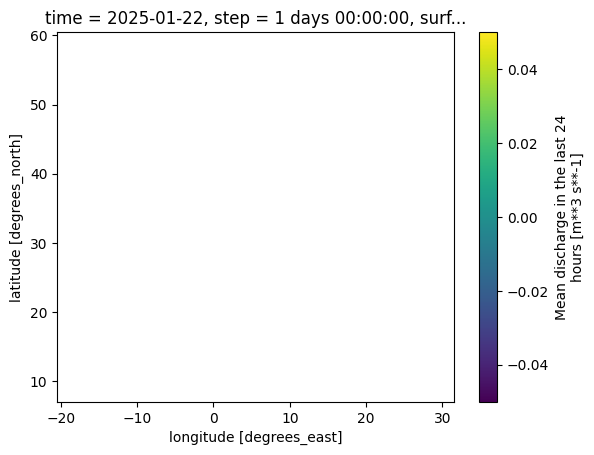

In [27]:
hoa_ds.dis24.isel(time = -10).plot()

In [28]:
print(hoa_ds.dis24.isel(time=-10))


<xarray.DataArray 'dis24' (latitude: 1070, longitude: 1040)>
[1112800 values with dtype=float32]
Coordinates:
    time        datetime64[ns] 2025-01-22
    step        timedelta64[ns] 1 days
    surface     float64 0.0
  * latitude    (latitude) float64 60.48 60.43 60.38 60.33 ... 7.125 7.075 7.025
  * longitude   (longitude) float64 -20.48 -20.43 -20.38 ... 31.38 31.43 31.48
    valid_time  datetime64[ns] 2025-01-23
Attributes:
    GRIB_paramId:                             240024
    GRIB_dataType:                            sfo
    GRIB_numberOfPoints:                      1112800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  1040
    GRIB_Ny:                                  1070
    GRIB_cfName:                              unkno

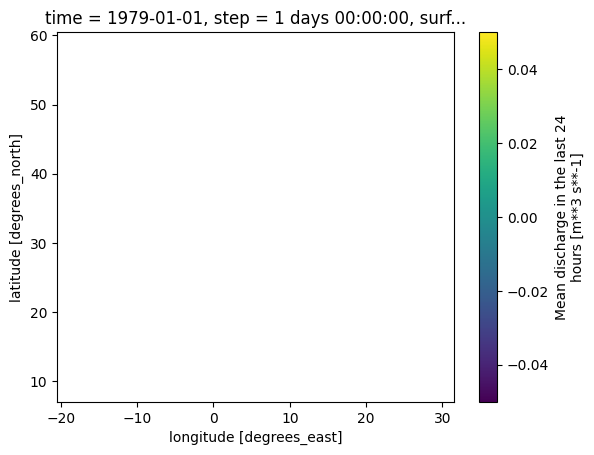

In [29]:
hoa_ds.dis24.isel(time=0).plot()


In [30]:
print(hoa_ds.dis24.isel(time=-10).min().values)
print(hoa_ds.dis24.isel(time=-10).max().values)


nan
nan


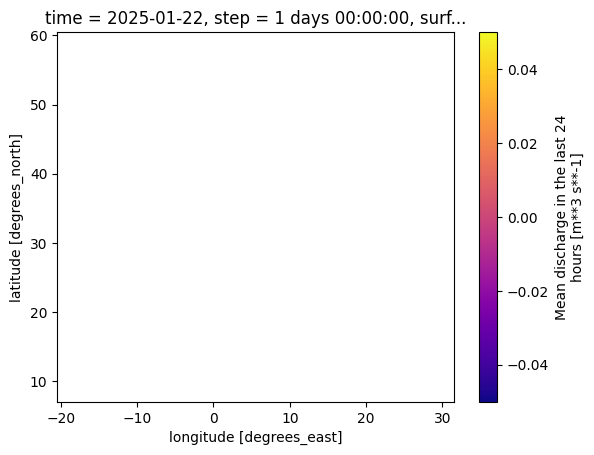

In [31]:
hoa_ds.dis24.isel(time=-10).plot(cmap='plasma')


In [32]:
print(hoa_ds.dis24.isel(time=-10).isnull().sum().values)


1112800
